In [280]:
#import all necessary packages
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [281]:
#set wd
os.chdir("C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\analytics vidhya'

In [283]:
#load train in df
df=pd.read_csv('train_loan.csv',header=0,na_values=["", " ", "NA","NaN"])

In [284]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [285]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [286]:
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [287]:
#--replace 3+ in dependents with 3
df['Dependents'][(df['Dependents']=='3+')]= 3

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [288]:
#replace credit history as 0 where null values are found
df['Credit_History'][(df['Credit_History'].isnull())]= 0

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [289]:
#convert Loan_Amount_Term,credit history, from int to factor/object
df['Loan_Amount_Term'] =  df['Loan_Amount_Term'].astype(object)
df['Credit_History'] =  df['Credit_History'].astype(object)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

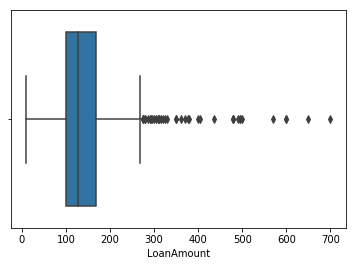

In [290]:
#sns.boxplot(df['ApplicantIncome'])
#sns.boxplot(df['CoapplicantIncome'])
sns.boxplot(df['LoanAmount'])

In [291]:
df["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [292]:
q25=100.000000
q75=168.000000
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df['LoanAmount'][df['LoanAmount']<min] = np.nan
df['LoanAmount'][df['LoanAmount']>max] = np.nan

-2.0
270.0


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [293]:
df["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [294]:
q25=0
q75=2297.250000
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df['CoapplicantIncome'][df['CoapplicantIncome']<min] = np.nan
df['CoapplicantIncome'][df['CoapplicantIncome']>max] = np.nan

-3445.875
5743.125


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [295]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [296]:
q25=2877.500000
q75=5795.000000
iqr=q75-q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

df['ApplicantIncome'][df['ApplicantIncome']<min] = np.nan
df['ApplicantIncome'][df['ApplicantIncome']>max] = np.nan

-1498.75
10171.25


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [305]:
missing_val=pd.DataFrame(df.isnull().sum())
missing_val

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [298]:
missing_val=missing_val.reset_index()

In [299]:
#Renaming Variable
missing_val = missing_val.rename(columns = {'index':'Variable Name', 0 : 'Missing-Percentage'})

#Calculating Missing Value Percentage
missing_val['Missing-Percentage'] = (missing_val['Missing-Percentage']/len(df))*100
missing_val

,Variable Name,Missing-Percentage
0,Loan_ID,0.000000
1,Gender,2.117264
2,Married,0.488599
3,Dependents,2.442997
4,Education,0.000000
5,Self_Employed,5.211726
6,ApplicantIncome,8.143322
7,CoapplicantIncome,2.931596
8,LoanAmount,9.934853
9,Loan_Amount_Term,2.280130


In [300]:
#too small rows and highly skewed rows and hence should not take mode
df=df.dropna(subset=['Gender'])
df=df.dropna(subset=['Married'])
df=df.dropna(subset=['Loan_Amount_Term'])
df=df.dropna(subset=['Self_Employed'])
df=df.dropna(subset=['LoanAmount'])
df=df.dropna(subset=['Dependents'])

In [301]:
df['Dependents'] =  df['Dependents'].astype(float)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [302]:
df['Dependents'] =  df['Dependents'].astype(object)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [303]:
copy_df=df.copy()
copy_df['ApplicantIncome'].loc[108]=np.nan #value=3800
copy_df['ApplicantIncome'] = copy_df['ApplicantIncome'].fillna(copy_df['ApplicantIncome'].mean())
copy_df['ApplicantIncome'].loc[108]#value 4132.5
copy_df=df.copy()
copy_df['ApplicantIncome'].loc[108]=np.nan #value=3800
copy_df['ApplicantIncome'] = copy_df['ApplicantIncome'].fillna(copy_df['ApplicantIncome'].median())
copy_df['ApplicantIncome'].loc[108]#value 3625
#take mean for MVA
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean())

C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [304]:

copy_df=df.copy()
copy_df['CoapplicantIncome'].loc[108]=np.nan #value=3600
copy_df['CoapplicantIncome'] = copy_df['CoapplicantIncome'].fillna(copy_df['CoapplicantIncome'].median())
copy_df['CoapplicantIncome'].loc[108]#value 2081
copy_df=df.copy()
copy_df['CoapplicantIncome'].loc[108]=np.nan #value=3600
copy_df['CoapplicantIncome'] = copy_df['CoapplicantIncome'].fillna(copy_df['CoapplicantIncome'].mean())
copy_df['CoapplicantIncome'].loc[108]#value 2305.5
#take mean for MVA

df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())



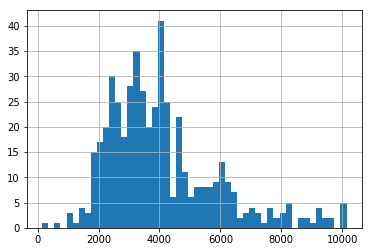

In [306]:
df['ApplicantIncome'].hist(bins=50)

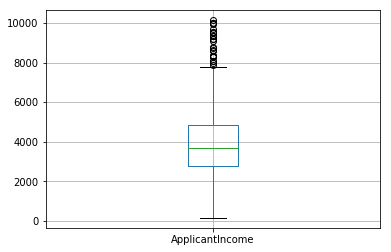

In [40]:
df.boxplot(column='ApplicantIncome')

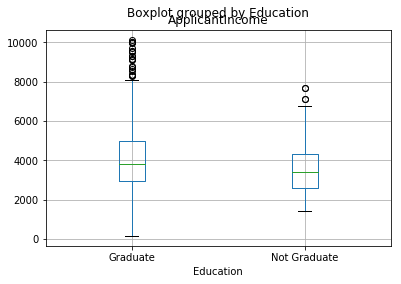

In [41]:
df.boxplot(column='ApplicantIncome', by = 'Education')

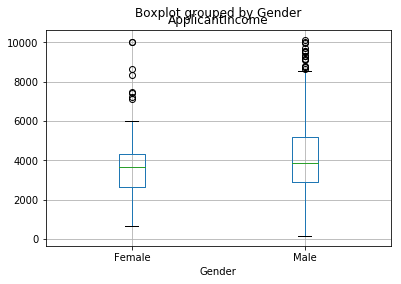

In [71]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

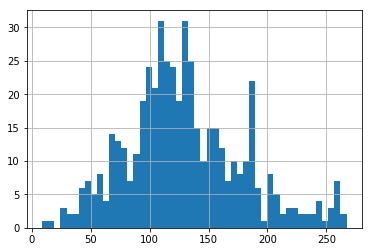

In [307]:
df['LoanAmount'].hist(bins=50)

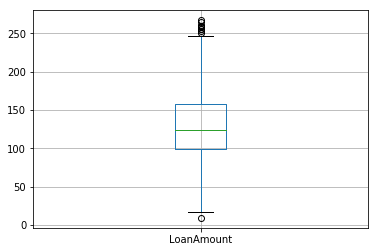

In [43]:
df.boxplot(column='LoanAmount')

In [308]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [309]:
df['Dependents'] =  df['Dependents'].astype(object)

In [310]:
df.count()

Loan_ID              490
Gender               490
Married              490
Dependents           490
Education            490
Self_Employed        490
ApplicantIncome      490
CoapplicantIncome    490
LoanAmount           490
Loan_Amount_Term     490
Credit_History       490
Property_Area        490
Loan_Status          490
dtype: int64

In [311]:
#Feature selection
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [312]:
cnames=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [313]:
df_corr=df.loc[:,cnames]
corr=df_corr.corr()
corr
#--no corelation found

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.232924,0.467653
CoapplicantIncome,-0.232924,1.000000,0.245951
LoanAmount,0.467653,0.245951,1.000000


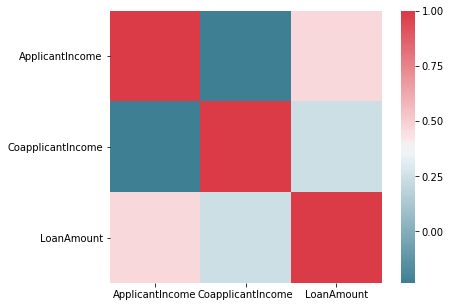

In [314]:
f,ax=plt.subplots(figsize=(7,5))
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [315]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [316]:
cat_names=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
for i in cat_names:
    print(i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(df['Loan_Status'],df[i]))
    print(p)
    print(p<=0.05)

Gender
0.3276524891900045
False
Married
0.011979739944449024
True
Dependents
0.3973675503994488
False
Education
0.0979200859775718
False
Self_Employed
0.43430254869395757
False
Loan_Amount_Term
0.029129295129316064
True
Credit_History
2.06211567231865e-18
True
Property_Area
0.016946445926208975
True


In [317]:
df=df.drop(['Loan_ID','Gender','Education','Dependents','Self_Employed'],axis=1)

In [318]:
df.head(10)

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Yes,4583.0,1508.000000,128.0,360,1,Rural,N
2,Yes,3000.0,0.000000,66.0,360,1,Urban,Y
3,Yes,2583.0,2358.000000,120.0,360,1,Urban,Y
4,No,6000.0,0.000000,141.0,360,1,Urban,Y
5,Yes,5417.0,4196.000000,267.0,360,1,Urban,Y
6,Yes,2333.0,1516.000000,95.0,360,1,Urban,Y
7,Yes,3036.0,2504.000000,158.0,360,0,Semiurban,N
8,Yes,4006.0,1526.000000,168.0,360,1,Urban,Y
10,Yes,3200.0,700.000000,70.0,360,1,Urban,Y
12,Yes,3073.0,1276.043583,200.0,360,1,Urban,Y


In [319]:
#Multicollinearity
outcome,predictors=dmatrices('Loan_Status~Married+ApplicantIncome+CoapplicantIncome+LoanAmount+Loan_Amount_Term+Credit_History+Property_Area',df,return_type='dataframe')
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(predictors.values,i) for i in range(predictors.shape[1])]
vif['features']=predictors.columns
vif

,VIF,features
0,516.208926,Intercept
1,1.128351,Married[T.Yes]
2,3.087044,Loan_Amount_Term[T.36.0]
3,3.021827,Loan_Amount_Term[T.60.0]
4,5.049890,Loan_Amount_Term[T.84.0]
5,4.068804,Loan_Amount_Term[T.120.0]
6,33.013339,Loan_Amount_Term[T.180.0]
7,4.034510,Loan_Amount_Term[T.240.0]
8,11.896490,Loan_Amount_Term[T.300.0]
9,62.915059,Loan_Amount_Term[T.360.0]


In [320]:
#drop loan amount term as causes multicollinearity
df=df.drop(['Loan_Amount_Term'],axis=1)

(array([ 2.,  7., 13., 21., 29., 30., 64., 77., 72., 39., 32., 26., 33.,
        12.,  7.,  7.,  7., 12.]),
 array([  9.        ,  23.33333333,  37.66666667,  52.        ,
         66.33333333,  80.66666667,  95.        , 109.33333333,
        123.66666667, 138.        , 152.33333333, 166.66666667,
        181.        , 195.33333333, 209.66666667, 224.        ,
        238.33333333, 252.66666667, 267.        ]),
 <a list of 18 Patch objects>)

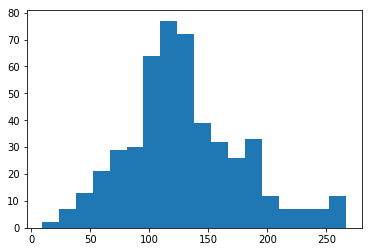

In [321]:
#feature scaling
%matplotlib inline
plt.hist(df['LoanAmount'],bins='auto')

In [165]:
for i in cnames:
    print(i)
    df[i]=(df[i]-df[i].mean())/df[i].std()

ApplicantIncome
CoapplicantIncome
LoanAmount


In [322]:
df.head(10)

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,Yes,4583.0,1508.000000,128.0,1,Rural,N
2,Yes,3000.0,0.000000,66.0,1,Urban,Y
3,Yes,2583.0,2358.000000,120.0,1,Urban,Y
4,No,6000.0,0.000000,141.0,1,Urban,Y
5,Yes,5417.0,4196.000000,267.0,1,Urban,Y
6,Yes,2333.0,1516.000000,95.0,1,Urban,Y
7,Yes,3036.0,2504.000000,158.0,0,Semiurban,N
8,Yes,4006.0,1526.000000,168.0,1,Urban,Y
10,Yes,3200.0,700.000000,70.0,1,Urban,Y
12,Yes,3073.0,1276.043583,200.0,1,Urban,Y


In [323]:
df['Property_Area'].value_counts()

Semiurban    195
Urban        155
Rural        140
Name: Property_Area, dtype: int64

In [324]:
df['Married']=df['Married'].replace('No','N')
df['Married']=df['Married'].replace('Yes','Y')
df['Property_Area']=df['Property_Area'].replace('Urban','1')
df['Property_Area']=df['Property_Area'].replace('Semiurban','2')
df['Property_Area']=df['Property_Area'].replace('Rural','3')
df['Married']=df['Married'].replace('N',0)
df['Married']=df['Married'].replace('Y',1)

In [325]:
X=df.values[:,0:6]
X
Y=df.values[:,6]
Y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N

In [326]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [327]:
Y_train

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N

In [328]:
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)

In [329]:
y_pred=clf.predict(X_test)

In [330]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [331]:
CM=pd.crosstab(Y_test,y_pred)
CM

col_0,N,Y
row_0,,
N,7,22
Y,20,49


In [332]:
accuracy=((7+49)/(7+49+22+20))*100
accuracy

57.14285714285714

In [333]:
RF_model=RandomForestClassifier(n_estimators=500).fit(X_train,Y_train)

In [334]:
RF_predictions=RF_model.predict(X_test)

In [335]:
CM=pd.crosstab(Y_test,RF_predictions)
CM

col_0,N,Y
row_0,,
N,10,19
Y,13,56


In [336]:
accuracy=((10+56)/(10+56+13+19))*100
accuracy

67.3469387755102

In [337]:
KNN_Model=KNeighborsClassifier(n_neighbors=1).fit(X_train,Y_train)

In [338]:
KNN_predictions=KNN_Model.predict(X_test)

In [339]:
CM=pd.crosstab(Y_test,KNN_predictions)
CM

col_0,N,Y
row_0,,
N,12,17
Y,12,57


In [340]:
accuracy=((12+57)/(12+57+12+17))*100
accuracy

70.40816326530613

In [341]:
NB_Model=GaussianNB().fit(X_train,Y_train)
NB_Pred=NB_Model.predict(X_test)
CM=pd.crosstab(Y_test,NB_Pred)
CM

col_0,N,Y
row_0,,
N,10,19
Y,12,57


In [342]:
accuracy=((10+57)/(10+57+12+19))*100
accuracy

68.36734693877551

In [343]:
#load train in df
df_test=pd.read_csv('test_loan.csv',header=0,na_values=["", " ", "NA","NaN"])

In [344]:
df_test=df_test.drop(['Gender','Education','Dependents','Self_Employed','Loan_Amount_Term'],axis=1)
df_test.head(10)

,Loan_ID,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,LP001015,Yes,5720,0,110.0,1.0,Urban
1,LP001022,Yes,3076,1500,126.0,1.0,Urban
2,LP001031,Yes,5000,1800,208.0,1.0,Urban
3,LP001035,Yes,2340,2546,100.0,NaN,Urban
4,LP001051,No,3276,0,78.0,1.0,Urban
5,LP001054,Yes,2165,3422,152.0,1.0,Urban
6,LP001055,No,2226,0,59.0,1.0,Semiurban
7,LP001056,Yes,3881,0,147.0,0.0,Rural
8,LP001059,Yes,13633,0,280.0,1.0,Urban
9,LP001067,No,2400,2400,123.0,1.0,Semiurban


In [345]:
df_test['LoanAmount'][df_test['LoanAmount'].isnull()]

78    NaN
101   NaN
188   NaN
247   NaN
289   NaN
Name: LoanAmount, dtype: float64

In [346]:
df_test['Married']=df_test['Married'].replace('No','N')
df_test['Married']=df_test['Married'].replace('Yes','Y')
df_test['Property_Area']=df_test['Property_Area'].replace('Urban','1')
df_test['Property_Area']=df_test['Property_Area'].replace('Semiurban','2')
df_test['Property_Area']=df_test['Property_Area'].replace('Rural','3')
df_test['Married']=df_test['Married'].replace('N',0)
df_test['Married']=df_test['Married'].replace('Y',1)
df_test['Credit_History'][(df_test['Credit_History'].isnull())]= 0
for i in cnames:
    print(i)
    df_test[i]=(df_test[i]-df_test[i].mean())/df_test[i].std()

ApplicantIncome
CoapplicantIncome
LoanAmount


C:\Users\vgonsalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [349]:
missing_val=pd.DataFrame(df_test.isnull().sum())
missing_val

,0
Loan_ID,0
Married,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Credit_History,0
Property_Area,0


In [352]:
#df_test=df_test.dropna(subset=['LoanAmount'])
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test=df_test.drop(['Loan_ID'],axis=1)
df_test.head(10)

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0.186206,-0.672417,-0.425844,1.0,1
1,1,-0.352211,-0.029808,-0.165116,1.0,1
2,1,0.039587,0.098714,1.171115,1.0,1
3,1,-0.502089,0.418306,-0.588799,0.0,1
4,0,-0.311484,-0.672417,-0.947299,1.0,1
5,1,-0.537725,0.793590,0.258567,1.0,1
6,0,-0.525303,-0.672417,-1.256914,1.0,2
7,1,-0.188283,-0.672417,0.177090,0.0,3
8,1,1.797590,-0.672417,2.344391,1.0,1
9,0,-0.489870,0.355758,-0.214002,1.0,2


In [353]:
df_test['Predicted_values'] = NB_Model.predict(df_test.iloc[:,0:6])
df_test.to_csv("pred_output_on_test_data(Python).csv",index=False)

In [354]:
df_test['Predicted_values'].value_counts()

Y    279
N     88
Name: Predicted_values, dtype: int64